In [1]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Step 1: Fetch live stock data
stock_ticker = 'GOOG'  # Replace 'AAPL' with your desired stock ticker
data = yf.download(stock_ticker, start='2020-01-01', end='2025-03-30', interval='1d')
close_prices = data['Close'].values.reshape(-1, 1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Step 2: Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [4]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [5]:
# Split data into training and testing datasets
training_data_len = int(len(scaled_data) * 0.8)
X_train, y_train = X[:training_data_len], y[:training_data_len]
X_test, y_test = X[training_data_len:], y[training_data_len:]

In [6]:
# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Step 3: Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=50)

C:\Users\navee\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0381
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0020
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0010
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 7.6863e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 7.9130e-04
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 7.6134e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 8.1612e-04
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 7.6478e-04
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 7.2014e-04
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 7.6079e-04
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 6.8281e-04
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 6.9232e-04
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 6.0320e-04
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 6.5953e-04
Epoch 15/50
33/33 ━━

In [8]:
# Step 4: Evaluate the model
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


In [9]:
# Calculate Mean Squared Error
mse = mean_squared_error(actual_prices, test_predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21.392304025268565


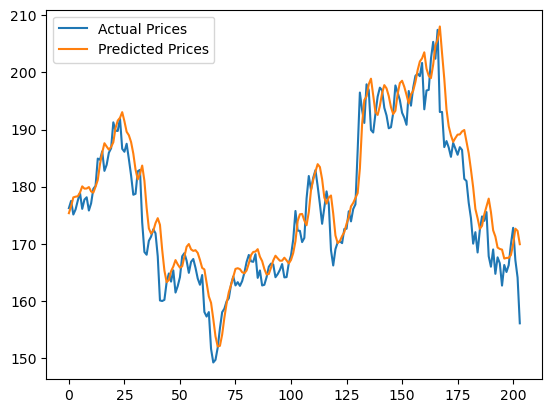

In [10]:
# Step 5: Visualize actual vs predicted prices
plt.plot(range(len(actual_prices)), actual_prices, label='Actual Prices')
plt.plot(range(len(test_predictions)), test_predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [11]:
# Step 6: Predict next 30 days
last_sequence = scaled_data[-sequence_length:]
prediction = []
for _ in range(30):
    pred = model.predict(last_sequence.reshape(1, sequence_length, 1))[0][0]
    prediction.append(pred)
    last_sequence = np.append(last_sequence[1:], pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━

In [12]:
# Transform predictions back to original scale
prediction = scaler.inverse_transform(np.array(prediction).reshape(-1, 1))
print("Predicted Prices for Next 30 Days:")
print(prediction)

Predicted Prices for Next 30 Days:
[[164.6531 ]
 [163.93272]
 [164.34102]
 [165.13965]
 [166.1437 ]
 [167.2793 ]
 [168.49838]
 [169.76283]
 [171.04144]
 [172.30939]
 [173.54819]
 [174.74524]
 [175.89355]
 [176.9908 ]
 [178.03879]
 [179.0423 ]
 [180.00851]
 [180.94585]
 [181.8635 ]
 [182.77066]
 [183.67604]
 [184.58746]
 [185.51155]
 [186.45386]
 [187.41841]
 [188.40813]
 [189.42468]
 [190.46884]
 [191.54048]
 [192.63884]]


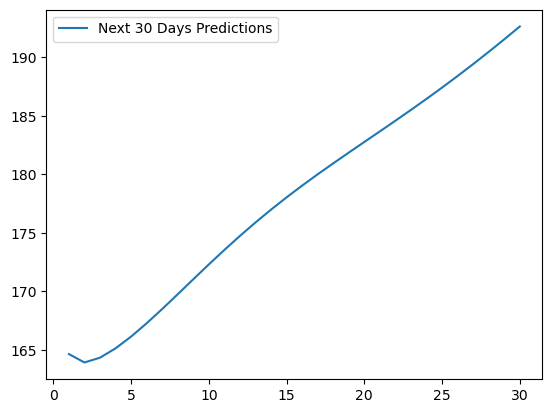

In [13]:
# Visualize next 30 days' predictions
plt.plot(range(1, 31), prediction, label='Next 30 Days Predictions')
plt.legend()
plt.show()